In [62]:
# Step 1 import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [63]:
# Step 2 read the csv files and create pandas dataframes
legitimate_df = pd.read_csv("structured_data_legitimate.csv")
phishing_df = pd.read_csv("structured_data_phishing.csv")

In [64]:
# Step 3 combine legitimate and phishing dataframes, and shuffle
df = pd.concat([legitimate_df, phishing_df], axis=0)

df = df.sample(frac=1)

In [65]:
# Step 4 remove'url' and remove duplicates, then we can create X and Y for the models, Supervised Learning
df = df.drop('URL', axis=1)

df = df.drop_duplicates()

X = df.drop('label', axis=1)
Y = df['label']

In [66]:
# Step 5 split data to train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [67]:
# Step 6 create a ML model using sklearn
svm_model = svm.LinearSVC()

# Random Forest
rf_model = RandomForestClassifier(n_estimators=60)

# Decision Tree
dt_model = tree.DecisionTreeClassifier()

# AdaBoost
ab_model = AdaBoostClassifier()



# Neural Network
nn_model = MLPClassifier(alpha=1)

# KNeighborsClassifier
kn_model = KNeighborsClassifier()

In [68]:
# Step 7 train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [69]:
# Step 8 make some predictions using test data
predictions = rf_model.predict(x_test)

In [70]:
# Step 9 create a confusion matrix and tn, tp, fn , fp
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=predictions).ravel()

In [71]:
# Step 10 calculate accuracy, precision and recall scores
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("accuracy --> ", accuracy)
print("precision --> ", precision)
print("recall --> ", recall)

accuracy -->  0.9830621056127532
precision -->  0.68
recall -->  0.2833333333333333


In [72]:
# K-fold cross validation, and K = 5
K = 5
total = X.shape[0]
index = int(total / K)

# 1
X_1_test = X.iloc[:index]
X_1_train = X.iloc[index:]
Y_1_test = Y.iloc[:index]
Y_1_train = Y.iloc[index:]

# 2
X_2_test = X.iloc[index:index*2]
X_2_train = X.iloc[np.r_[:index, index*2:]]
Y_2_test = Y.iloc[index:index*2]
Y_2_train = Y.iloc[np.r_[:index, index*2:]]

# 3
X_3_test = X.iloc[index*2:index*3]
X_3_train = X.iloc[np.r_[:index*2, index*3:]]
Y_3_test = Y.iloc[index*2:index*3]
Y_3_train = Y.iloc[np.r_[:index*2, index*3:]]

# 4
X_4_test = X.iloc[index*3:index*4]
X_4_train = X.iloc[np.r_[:index*3, index*4:]]
Y_4_test = Y.iloc[index*3:index*4]
Y_4_train = Y.iloc[np.r_[:index*3, index*4:]]

# 5
X_5_test = X.iloc[index*4:]
X_5_train = X.iloc[:index*4]
Y_5_test = Y.iloc[index*4:]
Y_5_train = Y.iloc[:index*4]

In [73]:
# X and Y train and test lists
X_train_list = [X_1_train, X_2_train, X_3_train, X_4_train, X_5_train]
X_test_list = [X_1_test, X_2_test, X_3_test, X_4_test, X_5_test]

Y_train_list = [Y_1_train, Y_2_train, Y_3_train, Y_4_train, Y_5_train]
Y_test_list = [Y_1_test, Y_2_test, Y_3_test, Y_4_test, Y_5_test]

In [74]:
def calculate_measures(TN, TP, FN, FP):
    model_accuracy = (TP + TN) / (TP + TN + FN + FP)
    model_precision = TP / (TP + FP)
    model_recall = TP / (TP + FN)
    return model_accuracy, model_precision, model_recall


rf_accuracy_list, rf_precision_list, rf_recall_list = [], [], []
dt_accuracy_list, dt_precision_list, dt_recall_list = [], [], []
ab_accuracy_list, ab_precision_list, ab_recall_list = [], [], []
svm_accuracy_list, svm_precision_list, svm_recall_list = [], [], []
nn_accuracy_list, nn_precision_list, nn_recall_list = [], [], []
kn_accuracy_list, kn_precision_list, kn_recall_list = [], [], []



for i in range(0, K):
    # ----- RANDOM FOREST ----- #
    rf_model.fit(X_train_list[i], Y_train_list[i])
    rf_predictions = rf_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=rf_predictions).ravel()
    rf_accuracy, rf_precision, rf_recall = calculate_measures(tn, tp, fn, fp)
    rf_accuracy_list.append(rf_accuracy)
    rf_precision_list.append(rf_precision)
    rf_recall_list.append(rf_recall)

    # ----- DECISION TREE ----- #
    dt_model.fit(X_train_list[i], Y_train_list[i])
    dt_predictions = dt_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=dt_predictions).ravel()
    dt_accuracy, dt_precision, dt_recall = calculate_measures(tn, tp, fn, fp)
    dt_accuracy_list.append(dt_accuracy)
    dt_precision_list.append(dt_precision)
    dt_recall_list.append(dt_recall)

    # ----- SUPPORT VECTOR MACHINE ----- #
    svm_model.fit(X_train_list[i], Y_train_list[i])
    svm_predictions = svm_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=svm_predictions).ravel()
    svm_accuracy, svm_precision, svm_recall = calculate_measures(tn, tp, fn, fp)
    svm_accuracy_list.append(svm_accuracy)
    svm_precision_list.append(svm_precision)
    svm_recall_list.append(svm_recall)

    # ----- ADABOOST ----- #
    ab_model.fit(X_train_list[i], Y_train_list[i])
    ab_predictions = ab_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=ab_predictions).ravel()
    ab_accuracy, ab_precision, ab_recall = calculate_measures(tn, tp, fn, fp)
    ab_accuracy_list.append(ab_accuracy)
    ab_precision_list.append(ab_precision)
    ab_recall_list.append(ab_recall)


    # ----- NEURAL NETWORK ----- #
    nn_model.fit(X_train_list[i], Y_train_list[i])
    nn_predictions = nn_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=nn_predictions).ravel()
    nn_accuracy, nn_precision, nn_recall = calculate_measures(tn, tp, fn, fp)
    nn_accuracy_list.append(nn_accuracy)
    nn_precision_list.append(nn_precision)
    nn_recall_list.append(nn_recall)

    # ----- K-NEIGHBOURS CLASSIFIER ----- #
    kn_model.fit(X_train_list[i], Y_train_list[i])
    kn_predictions = kn_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=kn_predictions).ravel()
    kn_accuracy, kn_precision, kn_recall = calculate_measures(tn, tp, fn, fp)
    kn_accuracy_list.append(kn_accuracy)
    kn_precision_list.append(kn_precision)
    kn_recall_list.append(kn_recall)

C:\Users\ajubh\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ajubh\AppData\Local\Temp\ipykernel_15984\4009843720.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  model_precision = TP / (TP + FP)
C:\Users\ajubh\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ajubh\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ajubh\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ajubh\AppData\Roaming\Python\Python310\site-packages\sklearn\sv

In [75]:
RF_accuracy = sum(rf_accuracy_list) / len(rf_accuracy_list)
RF_precision = sum(rf_precision_list) / len(rf_precision_list)
RF_recall = sum(rf_recall_list) / len(rf_recall_list)

print("Random Forest accuracy ==> ", RF_accuracy)
print("Random Forest precision ==> ", RF_precision)
print("Random Forest recall ==> ", RF_recall)

Random Forest accuracy ==>  0.9907000561244574
Random Forest precision ==>  0.8803646212304956
Random Forest recall ==>  0.6875341156505401


In [76]:
DT_accuracy = sum(dt_accuracy_list) / len(dt_accuracy_list)
DT_precision = sum(dt_precision_list) / len(dt_precision_list)
DT_recall = sum(dt_recall_list) / len(dt_recall_list)

print("Decision Tree accuracy ==> ", DT_accuracy)
print("Decision Tree precision ==> ", DT_precision)
print("Decision Tree recall ==> ", DT_recall)

Decision Tree accuracy ==>  0.9847893458358188
Decision Tree precision ==>  0.6967337357478203
Decision Tree recall ==>  0.7278916131679185


In [77]:
AB_accuracy = sum(ab_accuracy_list) / len(ab_accuracy_list)
AB_precision = sum(ab_precision_list) / len(ab_precision_list)
AB_recall = sum(ab_recall_list) / len(ab_recall_list)

print("AdaBoost accuracy ==> ", AB_accuracy)
print("AdaBoost precision ==> ", AB_precision)
print("AdaBoost recall ==> ", AB_recall)

AdaBoost accuracy ==>  0.9783427076246565
AdaBoost precision ==>  0.523738437001595
AdaBoost recall ==>  0.192220652614795


In [78]:
SVM_accuracy = sum(svm_accuracy_list) / len(svm_accuracy_list)
SVM_precision = sum(svm_precision_list) / len(svm_precision_list)
SVM_recall = sum(svm_recall_list) / len(svm_recall_list)

print("Support Vector Machine accuracy ==> ", SVM_accuracy)
print("Support Vector Machine precision ==> ", SVM_precision)
print("Support Vector Machine recall ==> ", SVM_recall)

Support Vector Machine accuracy ==>  0.9146545258475731
Support Vector Machine precision ==>  0.07811275406265314
Support Vector Machine recall ==>  0.1663678196287956


In [79]:
NN_accuracy = sum(nn_accuracy_list) / len(nn_accuracy_list)
NN_precision = sum(nn_precision_list) / len(nn_precision_list)
NN_recall = sum(nn_recall_list) / len(nn_recall_list)

print("Neural Network accuracy ==> ", NN_accuracy)
print("Neural Network precision ==> ", NN_precision)
print("Neural Network recall ==> ", NN_recall)

Neural Network accuracy ==>  0.9770799845189119
Neural Network precision ==>  nan
Neural Network recall ==>  0.07511737089201878


In [80]:
KN_accuracy = sum(kn_accuracy_list) / len(kn_accuracy_list)
KN_precision = sum(kn_precision_list) / len(kn_precision_list)
KN_recall = sum(kn_recall_list) / len(kn_recall_list)

print("K-Neighbours Classifier accuracy ==> ", KN_accuracy)
print("K-Neighbours Classifier precision ==> ", KN_precision)
print("K-Neighbours Classifier recall ==> ", KN_recall)

K-Neighbours Classifier accuracy ==>  0.9783425753076646
K-Neighbours Classifier precision ==>  0.5168568273831432
K-Neighbours Classifier recall ==>  0.14503750740124294


In [81]:
data = {'accuracy': [ SVM_accuracy, DT_accuracy, RF_accuracy, AB_accuracy, NN_accuracy, KN_accuracy],
        'precision': [ SVM_precision, DT_precision, RF_precision, AB_precision, NN_precision, KN_precision],
        'recall': [ SVM_recall, DT_recall, RF_recall, AB_recall, NN_recall, KN_recall]
        }

index = [ 'SVM', 'DT', 'RF', 'AB', 'NN', 'KN']

df_results = pd.DataFrame(data=data, index=index)

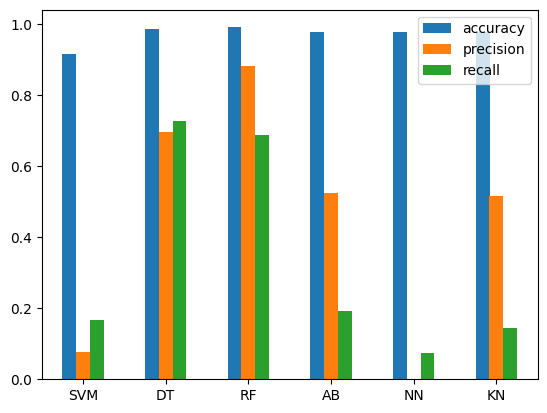

In [82]:
# visualize the dataframe
ax = df_results.plot.bar(rot=0)
plt.show()